# Bölüm 12: Makine Öğrenmesi
## Sınıflandırma Problemleri

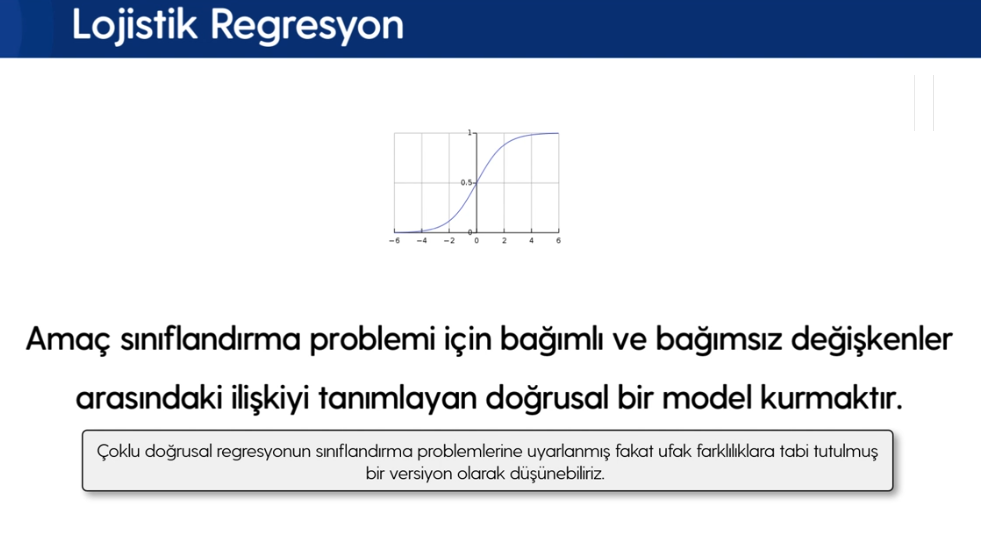

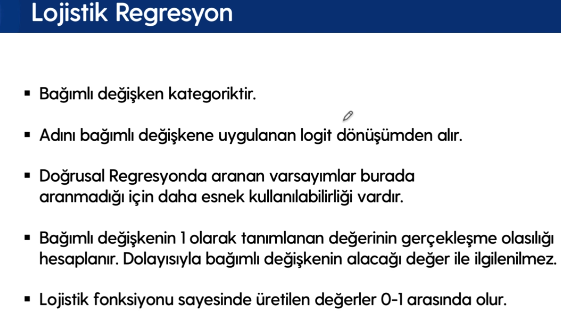

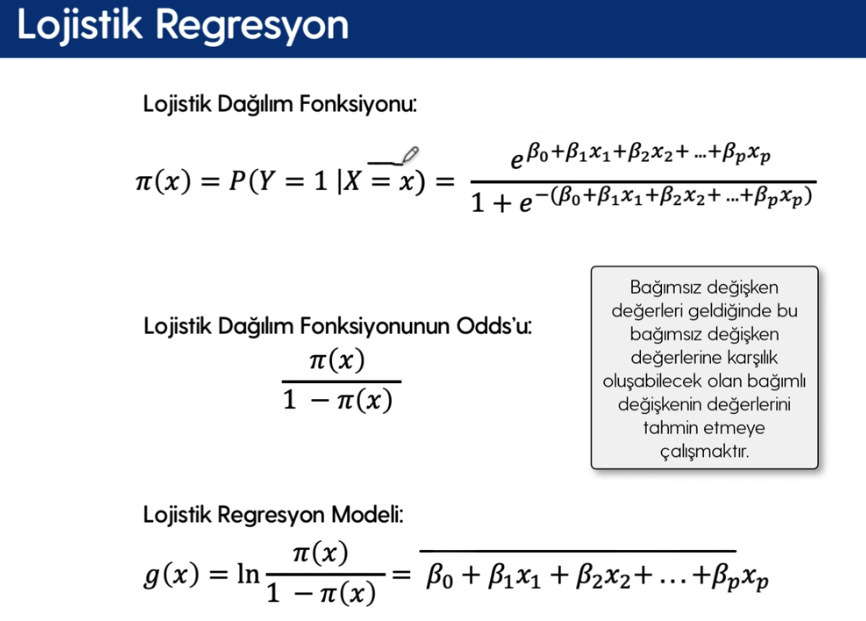

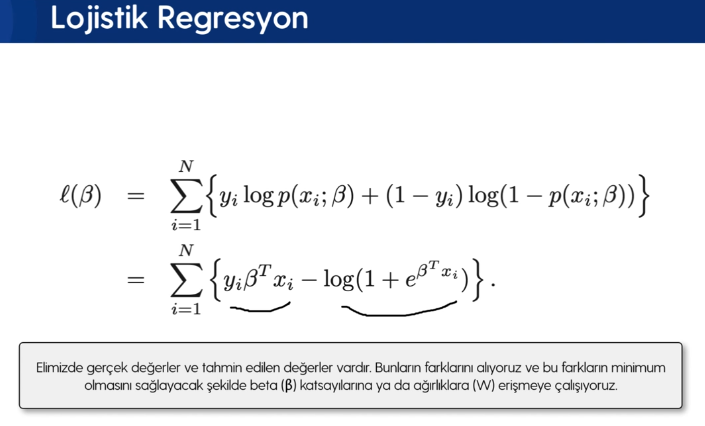

In [1]:
#pip install xgboost

In [2]:
#pip install lightgbm

In [3]:
#pip install catboost

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
#uyarıları kapatma
from warnings import filterwarnings
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = FutureWarning)

# Veri Seti Hikayesi ve Problem: Şeker Hastalağı Tahmini Lojistik Regresyon

# 1.3 Model & tahmin

In [6]:
# Bilgileri girildiğinde şeker hastalığı olup olmayacağını tahmin edebilir miyiz?
# Şeker hastası olacak mısın?
diabetes = pd.read_csv("diabetes.csv") # veri setini oku
df = diabetes.copy() # veri setini kopyala
df = df.dropna() # eksik değerleri uçur
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info();
# Outcome çıktı, hedef, bağımlı değişkendir.
# Kategorik olduğu halde nümerik olarak gösterilmiş temiz veridir.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [8]:
#kaç kişi
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

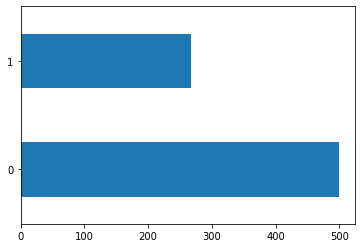

In [9]:
df["Outcome"].value_counts().plot.barh();

- 1 sınıfı şeker hastası olanlar
- 0 sınıfı şeker hastası olmayanlar

In [10]:
# bağımsız değişkenlerin gözlemi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Ayırt edici özellikler hangileri?

In [11]:
y = df["Outcome"] # bağımlı değişken
X = df.drop(["Outcome"], axis=1) # outcome dışındakilerini de bağımsız alma
# bağımlı değişken
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
#bağımsız değişkenler
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
#statsmodel
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()
# p-value değerleri 0.05 ten büyükse anlamlı ilişkisi yoktur

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                 0.05922
Time:                        11:42:23   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [14]:
#scikit-learn

In [15]:
# katsayıları bulmak için.
# rich ve lasso düzenleme ile katsayı bulma yöntemleri var.
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
# bağımlı değişken katsayıları
loj_model.intercept_

array([-5.89187257])

In [17]:
#bağımsız değişken katsayıları, ağırlaıkları
loj_model.coef_

array([[ 1.17058399e-01,  2.83878953e-02, -1.68889820e-02,
         7.55632152e-04, -6.42747880e-04,  5.97662192e-02,
         6.77481325e-01,  7.24009862e-03]])

## Tahmin & Model Tuning

In [18]:
# y nin tahmin edilen değerleri, 
# bu kişiler şeker hastalığı var mı yok mu? tahminleri alalım.
loj_model.predict(X)[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [19]:
# y nin gerçek değerleri 
y[:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [20]:
# kurmuş olduğumuz modelin başarısı nedir?
y_pred =loj_model.predict(X)

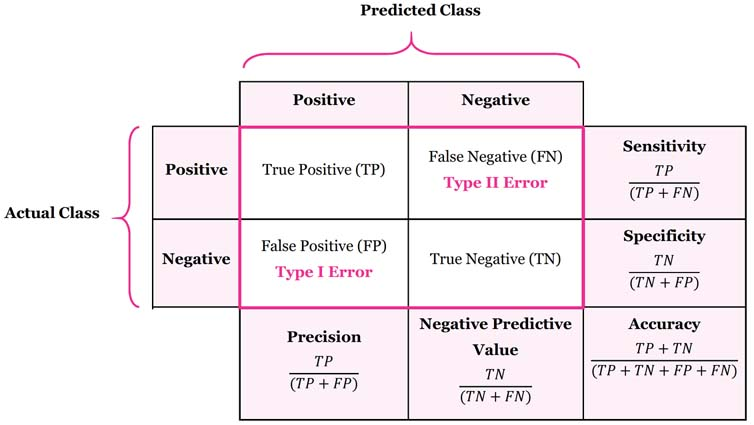 

In [21]:
# karmaşıklık matrisi ile hatamızı değerlendirelim mi?
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

### statsmodels

In [22]:
# başarı oranı 1 e yaklaştıkça başarı oranı artıyor.
# gerçek değer ile tahmin edilen değer arasında nasıl bir ilişki var
accuracy_score(y, y_pred)

0.7747395833333334

In [23]:
# kesinlik alma, daha detaylı rapor.
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [24]:
loj_model.predict(X)[0:10] # ilk 10 tahmin
# 1-0 sınıfı vermesi yerine kendimiz belirlemek istersek predict_proba kullan

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [25]:
# sınıf olasılıklarını nasıl öğrenebilirism?
# ileri düzey
# iki sınıf içindeki olasılıklar, eşik değerine göre dönüştüryo
loj_model.predict_proba(X)[0:10][:,0:2] # olasılık değerleri
# [0:10][:,0:1] sıfırıncı index ile sıfırıncı sınıfa ait olasılıklar
# sağ taraftaki olasılıkları inceleyen 1 değerini incelemelisin
# sol taraf 0 değerleri için

array([[0.35040546, 0.64959454],
       [0.91702399, 0.08297601],
       [0.22475153, 0.77524847],
       [0.92139046, 0.07860954],
       [0.16727005, 0.83272995],
       [0.79898738, 0.20101262],
       [0.88019325, 0.11980675],
       [0.27811879, 0.72188121],
       [0.32059056, 0.67940944],
       [0.92273634, 0.07726366]])

In [26]:
y[0:10] # gerçek değerler ile tahmini ilk 10 değeri kıyaslayabilirsin

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [27]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:, 1]
y_probs[0:10]

array([0.64959454, 0.08297601, 0.77524847, 0.07860954, 0.83272995,
       0.20101262, 0.11980675, 0.72188121, 0.67940944, 0.07726366])

In [28]:
# predict_proba fonk için Eşik değeri belirleyerek 1-0 dönüşümü yapılabilir
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
# y_probs içerisinde i ler gezerek kontrol işlemini gerçekleştirenlere 1 oluştur

In [29]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [30]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [31]:
accuracy_score(y, y_pred) # Doğru yaptığımız işler/Tüm işler

0.7747395833333334

In [32]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



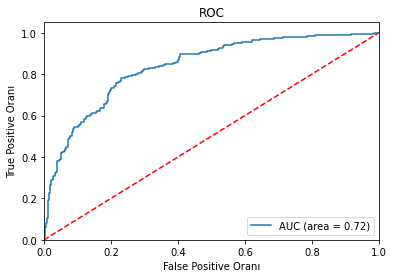

In [33]:
# roc eğrisi, eğri altındaki alan artıkça model başarısı yüksekti
# train hatası hesapladık.
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc) # legendleri yansıtma
plt.plot([0, 1], [0, 1],'r--') # rastgele hiç bir modelleme olmaması
plt.xlim([0.0, 1.0]) # eksen ayarlanması
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# 41.4. lojistik model tuning (model doğrulama)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [35]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train) # model nesnesi
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Bütün veri seti yerine train test bölümü yaparak modeli test edelim
# Test hatası değeri( test setinin gerçek değeri, tahmin değerleri )
accuracy_score(y_test, loj_model.predict(X_test))
# skor ne kadar büyükse başarımız o kadar yüksek
# bağımsız değişkenleri modele sok bunun sonucunda bağımlı değişkeni tahmin et

0.7532467532467533

In [38]:
# model doğrulama
# k katlı model doğrulama
# test hatası
cross_val_score(loj_model, X_test, y_test, cv = 5).mean()
# model, bağımsız değişken, y^ ile karşılaştırma yapmak istediğim y değerleri, cv

0.7748381128584644

# Naive Bayes

Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.

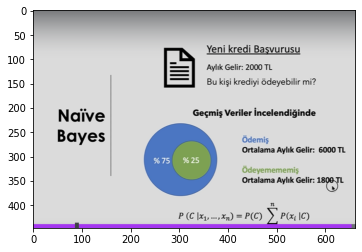

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("naive_bayes.png"))

## Gaussian Naive Bayes

In [43]:
df = diabetes.copy() # veri setini kopyala
df = df.dropna() # eksik değerleri uçur
y = df["Outcome"] # bağımlı değişken
X = df.drop(["Outcome"], axis=1) # outcome dışındakilerini de bağımsız al
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)
# Test oranının rastsallığınde dengesizlik durumu varsa (0=10000, 1=100 dengesiz)(500,268 biraz dengeli)
# Test verisi az gelmesindense 25 oranını arttırarak 30 yapmalıyız

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [47]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [50]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [51]:
y_pred = nb_model.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [53]:
cross_val_score(nb_model, X_test, y_test, cv = 5).mean()

0.7622571692876966

# K-En yakın komşu KNN
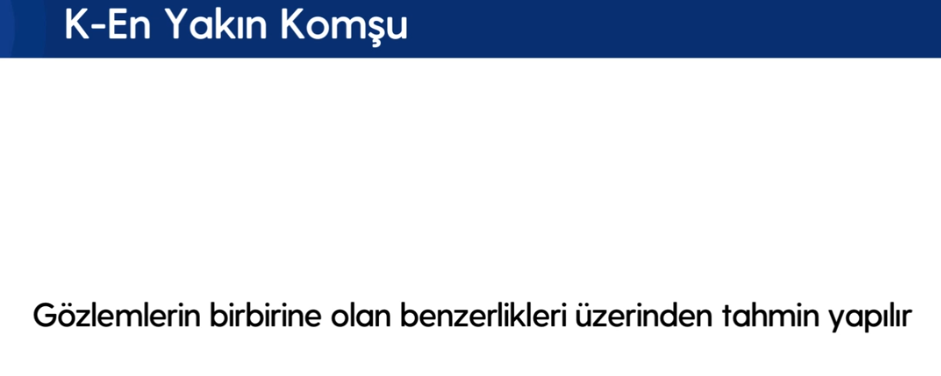

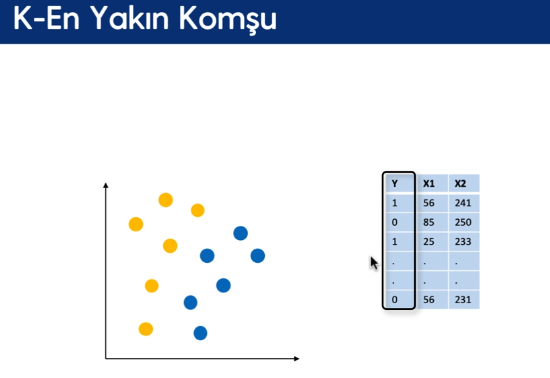

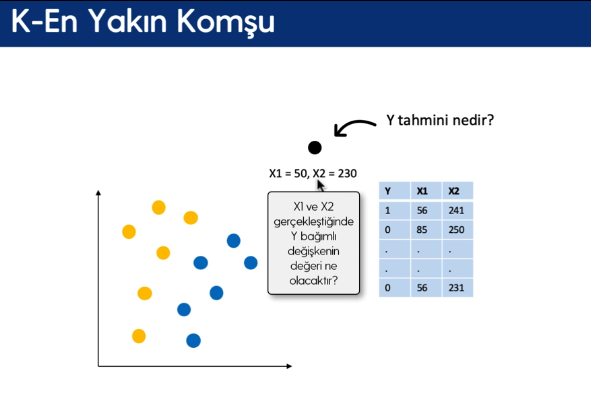

Tahminler gözlem benzerliğine göre yapılır. Bana arkadaşını söyle sana kim olduğunu söyleyeyim.

In [54]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                    random_state=42)
#random state, veri setini belli şekle göre bölmek

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Model & Tahmin

In [56]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [57]:
y_pred = knn_model.predict(X_test)

In [58]:
# (y nin gerçek değerleri, ynin tahmini değerlerri)
# yüz hastadan 68 sekizini başarılı şekilde sınıflandırmış
# bir kişi hasta ise doğru hastadır demiş
accuracy_score(y_test, y_pred)

0.6883116883116883

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## 7.Model Tuning

In [60]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [61]:
# aramak için ilgili parametre değerlerini girmek
#
knn_params = {"n_neighbors": np.arange(1,50)}

In [62]:
knn = KNeighborsClassifier()
#( model nesnesi, aranaccak olan paramtr, )
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [63]:
knn_cv_model.best_score_
print("En iyi skor:" + str(knn_cv_model.best_score_))

En iyi skor:0.748637316561845


In [64]:
# en iyi komşu sayısı nedir?
knn_cv_model.best_params_

{'n_neighbors': 11}

In [65]:
print("En iyi skor:" + str(knn_cv_model.best_score_))
print("En iyi parametreler: " + str(knn_cv_model.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [66]:
# final modeli
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [67]:
# başarı skoru hesaplama nın başka bir yolu.
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [68]:
y_pred = knn_tuned.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)
# başarımız 68 den 73 e çıktı, başarımız yükseldi

0.7316017316017316

# 8. Destek vektör makineleri, Suppport vektor
# SVM

Önce sınıflandırma problemleri için çıkmıştır. Sağlam dayanıklı bir algoritmadır.

Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır. İki doğru arasında nokta olmayacak şekilde arasındaki marjini max tutmaya çalışır.

## SVM Model & Tahmin

In [70]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [71]:
# doğrusal modeli görmek için kernel, doğrusal ayrım yaplıyor
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [72]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [73]:
# Test Hatası
y_pred = svm_model.predict(X_test)

In [74]:
#ilkel test hatası
accuracy_score(y_test, y_pred)

0.7445887445887446

## 10. SVM Model Tuning

In [75]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [77]:
svc_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [78]:
# radial base function
# svm_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}

# smv_cv_model = GridSearchCV(svm,svm_params,
#                             cv = 10,
#                             n_jobs = -1,
#                             verbose = 2 )

# smv_cv_model.fit(X_train, y_train)

In [79]:
print("En iyi score: " + str(svc_cv_model.best_score_))

En iyi score: 0.7765199161425576


In [80]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5, 'kernel': 'linear'}


In [81]:
# final model
svc_tuned = SVC( C= 5, kernel = "linear").fit(X_train, y_train)

In [82]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC

## Model & Tahmin

In [83]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [84]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train) # kernel default "rbf" kullanır

In [85]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [87]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [88]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [89]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [90]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [91]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# 11.Yapay Sinir Ağları (Çok katmanlı algılayıcılar)

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

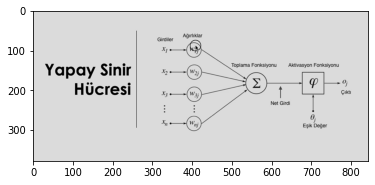

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("ysa.png"))

Geleneksel işlemcilerde, tek bir merkezi işlem birimi her hareketi sırasıyla gerçekleştirir. YSA’lar ise her biri büyük bir problemin bir parçası ile ilgilenen, çok sayıda basit işlem birimlerinden oluşmaktadır. En basit şekilde, bir işlem birimi, bir girdiyi bir ağırlık kümesi ile ağırlıklandırır, doğrusal olmayan bir şekilde dönüşümünü sağlar ve bir çıktı değeri oluşturur.

*1.Girdiler: Girdiler nöronlara gelen verilerdir. Bu girdilerden gelen veriler biyolojik sinir hücrelerinde olduğu gibi toplanmak üzere nöron çekirdeğine gönderilir.*

*2.Ağırlıklar: Yapay sinir hücresine gelen bilgiler girdiler üzerinden çekirdeğe ulaşmadan önce geldikleri bağlantıların ağırlığıyla çarpılarak çekirdeğe iletilir. Bu sayede girdilerin üretilecek çıktı üzerindeki etkisi ayarlanabilinmektedir.*

*3.Toplama Fonksiyonu (Birleştirme Fonksiyonu): Toplama fonksiyonu bir yapay sinir hücresine ağırlıklarla çarpılarak gelen girdileri toplayarak o hücrenin net girdisini hesaplayan bir fonksiyondur.*

*4.Aktivasyon fonksiyonu: Önceki katmandaki tüm girdilerin ağırlıklı toplamını alan ve daha sonra bir çıkış değeri (tipik olarak doğrusal olmayan) üreten ve bir sonraki katmana geçiren bir fonksiyondur. (örneğin, ReLU veya sigmoid ).*

*5.Çıktılar: Aktivasyon fonksiyonundan çıkan değer hücrenin çıktı değeri olmaktadır. Her hücrenin birden fazla girdisi olmasına rağmen bir tek çıktısı olmaktadır. Bu çıktı istenilen sayıda hücreye bağlanabilir.*

Birbirinden farklı yapay sinir hücrelerinin bir araya gelerek oluşturduğu yapıya "yapay sinir ağı" denir. Gerçek değerler - Tahmin edilen değerleri minimum hale getirecek şekilde kat sayılar veya karar kuralları çıkarmayı hedefleriz. Sık kullanılan algoritmalardan birisi çok katmanlı geriye yayılım algoritmalarıdır.

Rastgele atanmış kat sayılar birinci epoch elde ederek çıktı alırız. Daha sonra tüm epoch lardan sonra ağırlıklar değişir ve bunlardan optimum kat sayı elde edilir.

## 12.Model & Tahmin

In [98]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # dönüştürülmüş ölçeklendirme işlemi
X_test_scaled = scaler.transform(X_test)

In [102]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [94]:
from sklearn.neural_network import MLPClassifier

In [104]:
# multi layer perceptron clasification
mlpc= MLPClassifier().fit(X_train_scaled, y_train) # argümansız modeli train et

In [105]:
#dir(mlpc)

In [106]:
# ilke test hatası
# Hiç bir parametre olmadığı için sonuç kötü
y_pred = mlpc.predict(X_test_scaled) # ölçeklenmiş test seti
accuracy_score(y_test, y_pred)

0.7402597402597403

### 13. yapay sinir ağları Model Tuning

Algoritamalar karmaşıklaştıkça algoritmaların karakteristiğine dikkat edilir.
* Aktivasyon Fonksiyonu
* Solver argümanı(ağırlık hesaplama)
* Newton algoritması gibi algoritmalar
* Katman sayısı

Ön tanımlı değerleriyle kullanmak (Solver) yerine arka planda 'adam' methodu gibi ağırlık optimizasyon yöntemini tercih edebiliriz. 

In [110]:
mlpc.get_params()
# hidden_layer_sizes': (100, ) parantezli değerlerde bir değer varsa bir katman ve 100 sinir hücresi
# hidden_layer_sizes': (100,10) tapolojik 2 katmanlı
# hidden_layer_sizes': ( , , ) 3 katmanlı

# 'activation': 'relu' fonk ön tanımlı fakat logistic fonksiyon da deneyelim
# 'solver': 'adam' ağırlıkları optimize etme işlemi default değerdir
# 'learning_rate': 'constant' olduğu gibi bırakacağız
# 'alpha': 0.0001 -> doğrusal regresyon da ridge ve lasso algoritmalarında cezalandırma yönteminde kullanmıştık


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [111]:
# mlpc_params = {"alpha": [1,5,0.1, 0.01, 0.03, 0.005, 0.0001,0.00001],
#               "hidden_layer_sizes": [(10,10),
#                                      (100,100,100),
#                                      (100,100),
#                                      (3,5)],
#               "solver" : ["lbfgs"]}

In [112]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5),
                                     (5,3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation" : ["relu","logistic"]}

In [113]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                         cv = 10,
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [114]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (3, 5), 'solver': 'adam'}


In [134]:
mlpc_tuned = MLPClassifier(activation = "relu",
                           alpha = 0.01,
                           hidden_layer_sizes = (3,5),
                          solver = "adam")

In [135]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 5))

In [136]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

# CART

Amaç veri seti içerisindeki karmaşık yapıları nasit karar yapılarına döüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

## Model & Tahmin

In [145]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
cart = DecisionTreeClassifier(max_depth = 2)
cart_model = cart.fit(X, y)

In [149]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [151]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)



In [154]:
x = [9]

In [155]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [156]:
# Diğer değişkenleri de bağımsız değişken olarak ekle

In [157]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [158]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [161]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[6] <= 0.32649999111890793 else 0) if x[5
    ] <= 30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if
    x[5] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 
    32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else 
    (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[4] <= 30.0 else
    0) if x[1] <= 135.0 else 0) if x[2] <= 94.0 else 1 if x[2] <= 97.0 else
    0) if x[5] <= 26.949999809265

In [162]:
y_pred =cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.70995670995671

### 16. Model Tuning

In [163]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [166]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to s

In [168]:
# cart_grid = {"max_depth": [1,3,5,8,10],
#             "min_samples_split" : [1,3,5,8,10,20,50]}

In [169]:
# Sözlük yapısında model oluşturulur
# Ağacı budalasak mı budalamasak da mı saklasak :)
cart_grid = {"max_depth": range(1,10), # max derinlik > min_samples_split
            "min_samples_split" : list(range(2,50))} # bölünme için gerekli olan node içindeki min örnek sayısı
# min_samples_leaf en son node da barındırılacak örnek sayısı

In [170]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10,
                       n_jobs = -1,
                       verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [171]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [172]:
#finalmodeli

In [173]:
cart =DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [174]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

- Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile *değişkenler random subspace yöntemi ile seçilir.*


- Karar ağacını her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.


- Ağaç oluşturmada veri setinin 2/3’ü kullanılır. Dışarıda kalan veri ağaçları, performansın test edilmesi ve değişken öneminin belirlenmesi için kullanılır.


- Her düğüm noktasında rastgele değişken seçimi yapılır.( regresyon’da p/3,sınıflandırma’da karekök p)


- Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir. Çok başarısız olan ağaçların tahmin değerlerini neredeyse önemsemez. Bu özellik Random Forests’ı , Bagging’ten ayıran en büyük özelliktir.


- Random Forests da eksik değerlerle başa çıkabilir. Bunu yapmasının iki yolu var; sürekli değişkenleri değiştirmek için medyan değeri kullanma ve eksik değerlerin yakınlık ağırlıklı ortalamasını hesaplama.

In [175]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf_model = RandomForestClassifier().fit(X_train, y_train) # parametresiz model

In [178]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [180]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)
# valide edilmemiş hata

0.7619047619047619

#### 19.Model Tuning

In [181]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [183]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" f

In [184]:
rf_params = {"max_depth": [2,5,8,10], # 4 parametre için cv=10 vs olduğunda 100-150 ye çıkabilir
            "max_features": [2,5,8], # veri setinde 8 değişken varsa 8 seçersek bagging methodolojisi rf özel halidir
            "n_estimators": [100,500,1000], # kullanılacak ağaç sayısı
            "min_samples_split": [2,5,10]} # düğüm noktasında bölünme işlemi
# rf rastsallığı sağlamış bir algoritma

In [185]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

In [186]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [187]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [188]:
#final

In [191]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=1000)

In [192]:
# tuned edilmiş test hatsını bulma
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [193]:
rf_tuned.feature_importances_

array([0.05276164, 0.36363016, 0.07683429, 0.04878739, 0.05120641,
       0.16114228, 0.11215099, 0.13348684])

### Değişken önem düzeyi

Text(0.5, 0, 'Değişken Önem Düzeyleri')

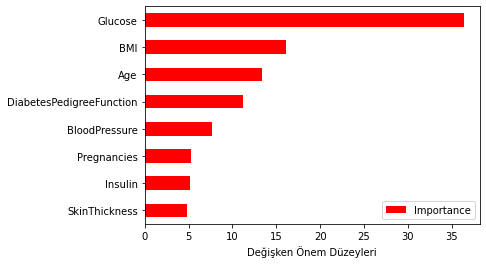

In [196]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Şeker hastalığı tespiti için hangi değişkenlerin etkili olduğunu bularak hastahane sistemleri yapılabilir. Yapay zeka destekli hastahane uygulamalarıyla şeker hastalığı olma olasılığı hesaplanır.

Uygulamayı ürüne dönüştürmek önemlidir. 

# Gradient Boosting Machines (GBM)

AdaBoost'un sınıflandırma  ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

Kümülatif bir biçimde artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

Adaboost + Cart + Bagging + RF -> En optimum algoritmadır.

* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklanının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmakta.
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...) 
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir. 
* Boosting+Gradient Descent

Bagging birbirinden bağımsız ağaçlar oluşturur (RF temeli)

Boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

In [201]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

In [203]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [204]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### 22.Model Tuning

In [205]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [207]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rat

In [208]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [209]:
gbm = GradientBoostingClassifier()

gbm_cv_model= GridSearchCV(gbm, gbm_params, cv = 10,
                      n_jobs = -1, verbose = 2)

In [210]:
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [211]:
print("En iyi parametreler: " + str(gbm_cv_model .best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [213]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,
                                max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 100)

In [214]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [215]:
# Test hatası
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

Text(0.5, 0, 'Değişken Önem Düzeyleri')

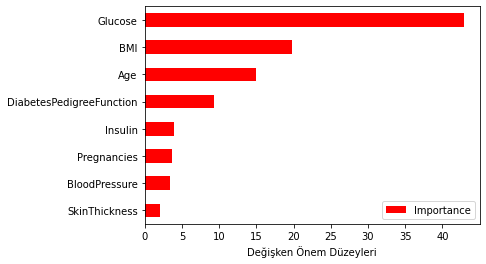

In [217]:
# değişken önem düzeyi
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir. 

* R, Python, Hadoop, Scala, Julia ile kullanılabilir. 
* Ölçeklenebilirdir.
* Hızlıdır. 
* Tahmin başarısı yüksektir. 
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.

XGBoost oldukça başarılı bir algoritmadır. 

In [218]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [219]:
#!pip install xgboost
from xgboost import XGBClassifier

In [220]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[16:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [221]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [222]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## 25. xboost Model Tuning

In [223]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.

In [226]:
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]
        }

In [227]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10,
                            n_jobs = -1, verbose = 2)

In [228]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[16:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [236]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [237]:
xgb = XGBClassifier(learning_rate = 0.02,
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [238]:
xgb_tuned =  xgb.fit(X_train,y_train)

[16:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [239]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

# LightGBM

Veri setindeki gözlem ve değişken sayısı çok fazla olduğunda eğitim süreleri uzuyor. LightGBM oldukça performanslıdır. Karar ağaçlarını kullanarak level-wise büyüme işlemi gerçekleşir. LightGBM ise split lere odaklanarak Leaf-wise büyümeye odaklanır.

XGBoost (BFS) geniş kapsamlı aramaya yaparken LightGBM DFS derin arama yaptığı için daha performanslıdır.

* Daha performanslı (XGBoost c++ ile yazılmış)
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi
* Breadth-first search (BFS) yerine depth-first search (DFS) (ağaç yapılarında derinlemesine ilk arama yapar)

In [240]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [241]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [242]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

  File "C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\joblib\externals\loky\backend\context.py", line 229, in _count_physical_cores
    capture_output=True)
  File "C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\subprocess.py", line 423, in run
    with Popen(*popenargs, **kwargs) as process:


In [243]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [244]:
lgbm_model

LGBMClassifier()

In [247]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=100)

In [249]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]} # min_sample_split yerine min_child_samples kullan

In [250]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

In [251]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

XGBoost a göre daha hızlı çalışır ve daha fazla parametreyi daha performanslı çalıştırır.

In [253]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [254]:
lgbm = LGBMClassifier(learning_rate = 0.05,
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20)

In [255]:
lgbm_tuned = lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [256]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)
# accuracy değerleri dışında diğer score lara da bakabilirsiniz
# XGBoost daha iyi sonuç vermiş fakat çok yavaş çalışmıştır.

0.7489177489177489

# CatBoost

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevi. (Sürekli değişkenlerde yandex in iddialı olduğu kadar iyi değildir)

CatBoost regresyon 45 dk dan fazla sürebilir. Hiper parametre uzayını düşürebilirsiniz.

* Kategorik değişken desteği
* Hızlı ve ölçeklenebilir GPU desteği
* Daha başarılı tahminler
* Hızlı train ve hızlı tahmin
* Rusyanın ilk açık kaynak kodlu, başarılı ML çalışması

## Model & Tahmin

In [257]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [258]:
#!pip install catboost
from catboost import CatBoostClassifier
# https://catboost.ai/

In [259]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 151ms	remaining: 2m 31s
1:	learn: 0.6843414	total: 156ms	remaining: 1m 17s
2:	learn: 0.6805760	total: 161ms	remaining: 53.4s
3:	learn: 0.6765782	total: 166ms	remaining: 41.2s
4:	learn: 0.6720829	total: 169ms	remaining: 33.7s
5:	learn: 0.6681617	total: 172ms	remaining: 28.5s
6:	learn: 0.6641912	total: 175ms	remaining: 24.9s
7:	learn: 0.6602881	total: 178ms	remaining: 22.1s
8:	learn: 0.6562626	total: 181ms	remaining: 19.9s
9:	learn: 0.6528483	total: 183ms	remaining: 18.1s
10:	learn: 0.6487823	total: 186ms	remaining: 16.7s
11:	learn: 0.6454980	total: 188ms	remaining: 15.5s
12:	learn: 0.6418953	total: 190ms	remaining: 14.5s
13:	learn: 0.6374431	total: 193ms	remaining: 13.6s
14:	learn: 0.6339676	total: 195ms	remaining: 12.8s
15:	learn: 0.6304252	total: 198ms	remaining: 12.2s
16:	learn: 0.6266998	total: 201ms	remaining: 11.6s
17:	learn: 0.6237660	total: 204ms	remaining: 11.1s
18:	learn: 0.6204394	total: 206ms	remaining: 10.6s
19:	learn: 

In [260]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## 31.Model Tuning

In [261]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [262]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 5.34ms	remaining: 1.06s
1:	learn: 0.6811157	total: 10.2ms	remaining: 1.01s
2:	learn: 0.6752970	total: 15.3ms	remaining: 1s
3:	learn: 0.6697432	total: 20.3ms	remaining: 994ms
4:	learn: 0.6641758	total: 25.4ms	remaining: 992ms
5:	learn: 0.6576656	total: 30.5ms	remaining: 986ms
6:	learn: 0.6521870	total: 35.4ms	remaining: 975ms
7:	learn: 0.6465564	total: 40.7ms	remaining: 977ms
8:	learn: 0.6407595	total: 45.9ms	remaining: 973ms
9:	learn: 0.6357725	total: 50.7ms	remaining: 964ms
10:	learn: 0.6299942	total: 55.9ms	remaining: 960ms
11:	learn: 0.6240480	total: 60.7ms	remaining: 951ms
12:	learn: 0.6196095	total: 65.9ms	remaining: 947ms
13:	learn: 0.6148715	total: 71.2ms	remaining: 946ms
14:	learn: 0.6092626	total: 76.2ms	remaining: 940ms
15:	learn: 0.6046764	total: 80.7ms	remaining: 928ms
16:	learn: 0.6012725	total: 85.7ms	remaining: 922ms
17:	learn: 0.5958121	total: 90.8ms	remaining: 918ms
18:	learn: 0.590

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [263]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [264]:
catb = CatBoostClassifier(iterations = 200,
                          learning_rate = 0.01,
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 6.32ms	remaining: 1.26s
1:	learn: 0.6811157	total: 12ms	remaining: 1.19s
2:	learn: 0.6752970	total: 17.5ms	remaining: 1.15s
3:	learn: 0.6697432	total: 23.1ms	remaining: 1.13s
4:	learn: 0.6641758	total: 30.3ms	remaining: 1.18s
5:	learn: 0.6576656	total: 35.5ms	remaining: 1.15s
6:	learn: 0.6521870	total: 41.3ms	remaining: 1.14s
7:	learn: 0.6465564	total: 47.3ms	remaining: 1.13s
8:	learn: 0.6407595	total: 53.2ms	remaining: 1.13s
9:	learn: 0.6357725	total: 57.6ms	remaining: 1.09s
10:	learn: 0.6299942	total: 62.3ms	remaining: 1.07s
11:	learn: 0.6240480	total: 67ms	remaining: 1.05s
12:	learn: 0.6196095	total: 71.7ms	remaining: 1.03s
13:	learn: 0.6148715	total: 76.8ms	remaining: 1.02s
14:	learn: 0.6092626	total: 82.4ms	remaining: 1.02s
15:	learn: 0.6046764	total: 87ms	remaining: 1s
16:	learn: 0.6012725	total: 92.1ms	remaining: 992ms
17:	learn: 0.5958121	total: 96.7ms	remaining: 978ms
18:	learn: 0.5903243	total: 102ms	remaining: 972ms
19:	learn: 0.5866024	total: 107m

In [265]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# 32. Tüm Modellerin Karşılaştırılması

In [266]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned

]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.8918%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 75.7576%


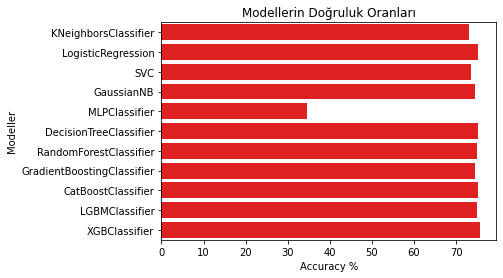

In [267]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)


sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');